In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import vclamp_evaluator_HMMtoHH as vcl_ev
import HMM_plotter as plotter
import generalized_genSim_shorten_time_HMM as ggsdHMM
import generalized_genSim_shorten_time as ggsd
#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_med.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206, -3.2027341340615103], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.17500000000004]}


In [47]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [48]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [49]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [50]:
print(log)


gen	nevals	avg   	std   	min    	max        
1  	500   	208174	612274	26.1403	2.10093e+06
2  	500   	193764	611188	26.1403	5.91231e+06


In [51]:
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [52]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'
import eval_helper_na12mut as ehn

def get_place_in_range(opt_ps,csv_file,print_flg = False):
    p_names = []
    p_fact = []
    param_list = ehn.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
        if print_flg:
            print(f'{p_name} - lb:{lb} ub:{ub} p:{fact}')
    return p_names,p_fact
    

In [ ]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [63.28727594448052, 0.028684496180985317, 0.037983542887273576, 0.0693290156177158, 362.78035321018604, 0.07978732349944577, 2.334975203545049, 0.12473617757083616, 332.58376570966846, 0.055596684539296504, 2.7398439357990765, 0.051881164712156334, 0.6153345625809071, 0.22550064067926662, 0.0812358658684167, 2.2248573174228463, 308.17291216939844, 0.06738914051269412, 6.814909829497992, -13.940377665590638, 26115.849638302214, 3.4235452653383383, 9.229417713230928]


In [ ]:

pnames,pfactors = get_place_in_range(p,csv_file)



In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
yaxis = range(len(pnames))
for p in hof[-10:-2]:
    pnames,pfactors = get_place_in_range(p,csv_file)
    ax.plot(pfactors,yaxis,'.')
pnames,pfactors = get_place_in_range(hof[-1],csv_file,True)
ax.plot(pfactors,yaxis,'.')
ax.set_yticks(yaxis)
ax.set_yticklabels(pnames)


1
2
3
4


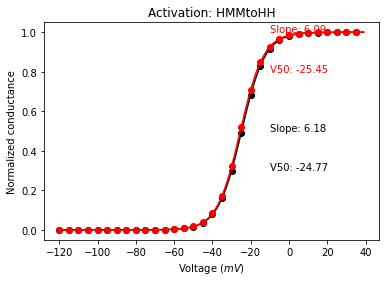

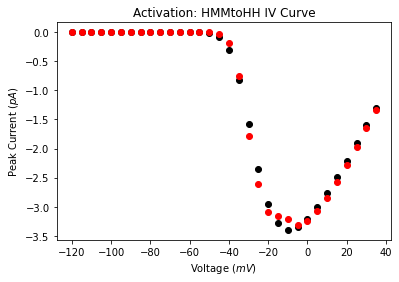

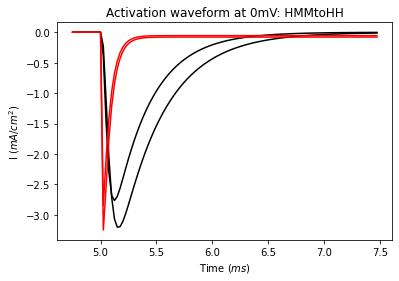

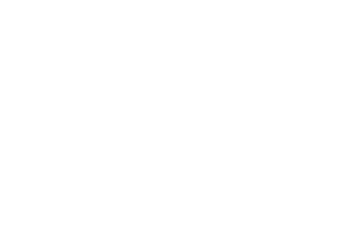

In [10]:
plotter.make_act_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

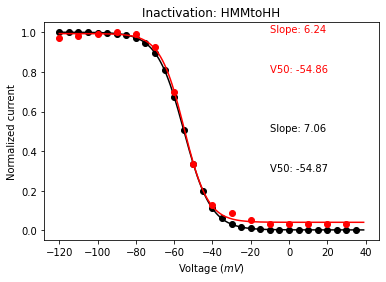

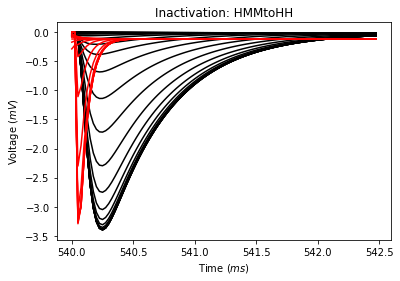

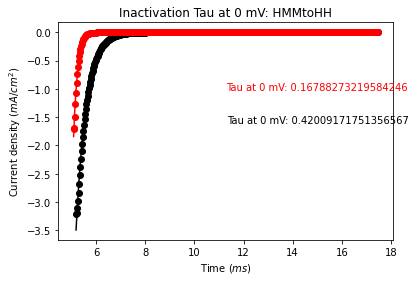

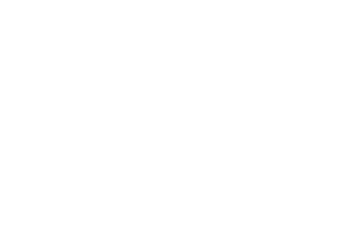

In [11]:
plotter.make_inact_plots(p, "HMMtoHH", None, None, "./Plots_Folder/jinan_test.pdf", is_HMM = True, channel_name = channel_name,channel_name_HH = 'na16')

In [12]:
import eval_helper_na12mut8st as ehn8
import eval_helper_na12mut as ehn
import curve_fitting as cf
act_obj = ggsdHMM.Activation(channel_name='na16')

# Test HH Target data

In [13]:
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)

In [14]:
is_HMM = False 
wild_data = {}
# Create genSim objects
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)
act_obj = ggsd.Activation(channel_name='na16')
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
peak_amp = ehn.find_peak_amp(act_obj,[14,33])
time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
inact_obj = ggsd.Inactivation(channel_name='na16')
#recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HH)

ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
#y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
# gv_slope, v_half_act, top, bottom = (1, 1, 1, 1)
# ssi_slope, v_half_inact, top, bottom = (1, 1, 1, 1)
# y0, plateau, percent_fast, k_fast, k_slow = (1, 1, 1, 1, 1)

# Ramp Protocol
# ramp = ggsdHMM.Ramp(channel_name=self.channel_name)
# ramp_area = ramp.areaUnderCurve
# persistent_curr = ramp.persistentCurrent()

wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
#wild_data['tau_fast'] = 1 / k_fast
#wild_data['tau_slow'] = 1 / k_slow
#wild_data['percent_fast'] = percent_fast
# wild_data['udb20'] = 0
wild_data['tau0'] = tau0
# wild_data['ramp'] = ramp_area
# wild_data['persistent'] = persistent_curr

# Some extra objectives added last minute, so this is a bit hard-coded
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.872868637744034, 'ssi_slope': 7.05877216715777, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


# Test HMM

In [15]:
import curve_fitting as cf
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)

In [16]:
print(gv_slope, v_half_act, top, bottom )

6.182889397919378 -24.766773949665836 0.9999999999984814 9.963248240373344e-11


In [17]:
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
           

In [18]:
print(ssi_slope, v_half_inact, top, bottom)

7.05877216715777 -54.872868637744034 0.002864608183022642 1.0008524331966844


In [19]:
import eval_helper as eh
import scoring_functions_relative as sf

objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
inact_obj = ggsdHMM.Inactivation(channel_name='na12mut8st')
# recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HMM)
recov_obj = None
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [20]:
import curve_fitting as cf
errors = []
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
if 'v_half_act' in objective_names:
    vhalf_act_error = (v_half_act - wild_data['v_half_act'])**2
    errors.append(vhalf_act_error)
if 'gv_slope' in objective_names:
    gv_slope_error = (gv_slope - wild_data['gv_slope'])**2
    errors.append(gv_slope_error)
if 'v_half_ssi' in objective_names:
    v_half_ssi_error = (v_half_inact - wild_data['v_half_ssi'])**2
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objective_names:
    ssi_slope_error = (ssi_slope - wild_data['ssi_slope'])**2
    errors.append(ssi_slope_error)
if 'peak_current' in objective_names:
    peak_amp = ehn.find_peak_amp(act_obj,[14,33])
    peak_amp_errors = np.sum([np.abs(peak_amp[i] - wild_data['peak_amp'][i]) for i in range(len(peak_amp))])
    errors.append(peak_amp_errors)
if 'ttp' in objective_names:
    time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
    time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])
    errors.append(time_to_peak_error)
if 'tau0' in objective_names:
    act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
    eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)
    try:
        tau0 = ehn.find_tau0(act_obj)
        tau0_error = (tau0 - wild_data['tau0'])**2
    except e:
        tau0_error = 1000
    errors.append(tau0_error)

print(errors)

[0.46532158604806056, 0.008424369309243748, 0.00023805665021067117, 0.6702913311486127, 1.7218913962309161, 4.500000000000064, 0.06360937227499551]


In [21]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is: {peak_amp} WT:{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is: {time_to_peak} WT:{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")


['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'peak_current', 'ttp']
 vhalf_act is: -25.448918792091593 WT:-24.766773949665836 error: 0.46532158604806056
 gv_slope is: 6.091105034821714 WT:6.182889397919378 error: 0.008424369309243748
 v_half_ssi is: -54.85743955318886 WT:-54.872868637744034 error: 0.00023805665021067117
 ssi_slope is: 6.240058950488701 WT:7.05877216715777 error: 0.6702913311486127
 peak_current is: [-0.004122784868173807, -0.030125116566204202, -0.18160561181295234, -0.7605667508239262, -1.7902194129047502, -2.6090721636373564, -3.083284299059085, -3.164418819248939, -3.2039901751844124, -3.3150935975395335, -3.2487939502023684, -3.07832952183308, -2.8455131556457607, -2.5746091548084173, -2.2802322735560128, -1.9713978610317533, -1.6537151442275424, -1.3306708043273991] WT:[-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.3989031762

In [22]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


-4.500000000000064

In [23]:
print(act_obj.ipeak_vec)

[-1.7012533284571165]


In [24]:
cf.calc_act_obj(act_obj)

(10.481720314677114,
 -49.351686983277006,
 0.9999999999710545,
 2.1960416018198177e-10)

In [25]:
print(act_obj.ipeak_vec[12])

-0.9401084657583978


In [26]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

-0.9401084657583978


In [27]:
print(act_obj.t_vec[np.argmin(i12)])

5.20000000000004


In [28]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

19
[5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.17500000000004]


In [29]:
print(best_hof)

[186.73338156205256, 0.10813164711097231, 0.029319835250103933, 0.07120654074855348, 93.91536089027035, 0.08090959949402984, 1.35668970828572, 0.1671212108646942, 243.1301195381601, 0.21529467060067212, 0.6634905462771916, 0.033396746167439526, 1.3564533874994746, 1.3010878798905763, 0.1354411512419964, 2.1450912134328473, 32.708986907401616, 0.014817428726692582, -14.998928338148245, -18.00606885566765, 8180.999847591984, 2.3340666630537497, 4.717590208990357]
